In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [2]:
boston=datasets.load_boston()

In [3]:
feature_names=np.array(boston.feature_names)

In [4]:
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
x=np.array(boston.data)

In [6]:
y=np.array(boston.target)

In [7]:
print(x.shape)

(506, 13)


In [8]:
y.shape

(506,)

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [10]:
#feature scaling
rs_x=RobustScaler()
rs_y=RobustScaler()

In [11]:
Xtrain=rs_x.fit_transform(xtrain)
Xtest=rs_x.transform(xtest)

In [12]:
Ytrain=rs_y.fit_transform(ytrain.reshape(-1,1))
Ytest=rs_y.transform(ytest.reshape(-1,1))

In [13]:
Ytrain=Ytrain.reshape(-1, )
Ytest=Ytest.reshape(-1, )
print(Ytrain.shape,Ytest.shape)

(404,) (102,)


In [14]:
mat=LinearRegression()

In [15]:
mat.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
Ypred=mat.predict(Xtest)

In [17]:
print("Accuracy on training data:",mat.score(Xtrain,Ytrain))

Accuracy on training data: 0.7532407680565855


In [18]:
print("Accuracy on training data: ",mat.score(Xtest,Ytest))

Accuracy on training data:  0.6699984964369482


In [19]:
print("Mean Squared error: ", mean_squared_error(Ytest,Ypred))

Mean Squared error:  0.361813817766319


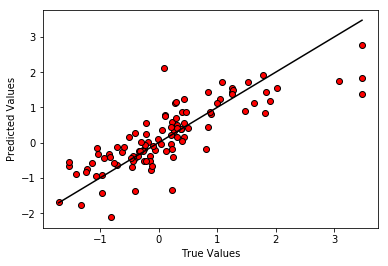

In [20]:
plt.scatter(Ytest,Ypred,color="red",edgecolors=(0,0,0))
plt.plot([Ytest.min(),Ytest.max()],[Ytest.min(),Ytest.max()],'k-')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()